In [4]:
%matplotlib inline

import gym
import itertools
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import sys
import frozen_lake as fl
import pandas as pd

matplotlib.style.use('ggplot')
np.random.seed(10)

In [22]:
import gym
import numpy as np 
import copy
import time

env = fl.FrozenLakeEnv(desc=None, map_name="4x4",is_slippery=True)
eta = .1
gma = 0.9
epis = 50000
threshold = 0.005
epsilon = 1
radr = 0.999

def q_learner(env, eta, gma, epis, epsilon, radr, threshold, iterations=100):

    Q = np.zeros([env.observation_space.n,env.action_space.n])
    rev_list = [] # rewards per episode calculate
    q_diff_list = []
    run_time_list = []
    iteration_time_list = []
    run_start_time = time.time()

    # 3. Q-learning Algorithm
    for i in range(epis):
        
        iteration_start_time = time.time()
        
        old_q = copy.deepcopy(Q)
        s = env.reset()
        rAll = 0
        d = False
        j = 0

        #The Q-Table learning algorithm
        while j < iterations:
            #env.render()
            j+=1

            # Choose action from Q table      
            #a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
            #print(a)

            if (np.random.random() <= epsilon):
                a = np.random.randint(0,  env.action_space.n)
            else:
                a = np.argmax(Q[s,:]) 

            s1,r,d,_ = env.step(a)

            #Update Q-Table with new knowledge
            Q[s,a] = Q[s,a] + eta*(r + gma*np.max(Q[s1,:]) - Q[s,a])
            rAll += r
            s = s1

            if d == True:
                break
        
        iteration_end_time =time.time()
        iteration_time = iteration_end_time - iteration_start_time

        if epsilon >= threshold:
            epsilon = epsilon * radr
        

        rev_list.append(rAll)
        diff = np.sum(np.abs(Q-old_q))
        q_diff_list.append(diff)
        iteration_time_list.append(iteration_time)
        run_time_list.append(iteration_end_time - run_start_time)
        
        #print(diff)
        
        if i%100000 == 0:
            print('Episode: ' + str(i))
            print("Reward Sum on last 200 episodes: " + str(sum(rev_list[-200:-1])/200))

        
    return Q, q_diff_list, rev_list, old_q, run_time_list, iteration_time_list

Alpha: 0.03
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.755


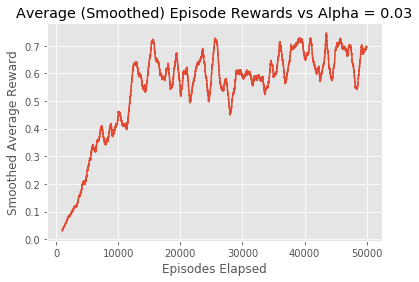

Alpha: 0.05
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.445


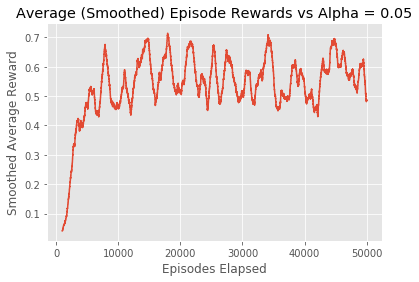

Alpha: 0.1
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.47


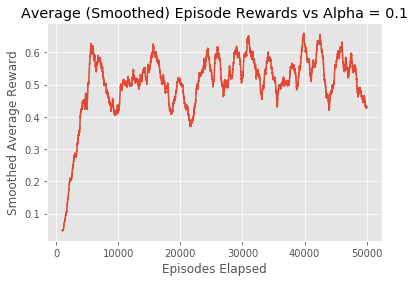

Alpha: 0.2
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.475


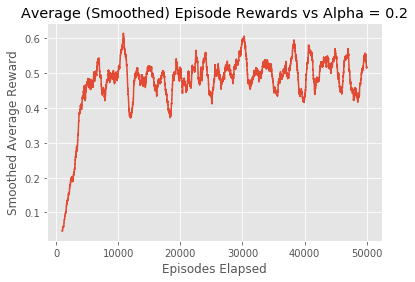

Alpha: 0.3
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.48


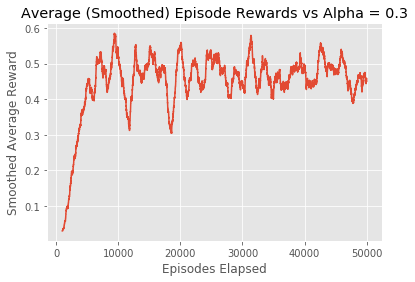

Alpha: 0.5
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.55


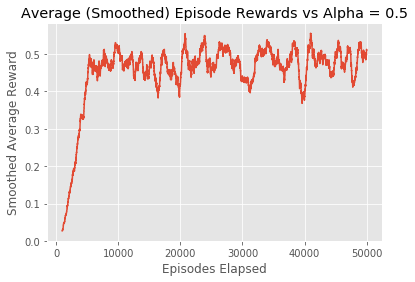

In [85]:
alpha_list = [0.03,0.05,0.1,0.2,0.3,0.5]
results = np.zeros((50000,1))

for a in alpha_list:
    print('Alpha: ' + str(a))
    q, q_diff, rewards_list, old_q, run_time_list, iteration_time_list = q_learner(env, eta=a, gma=0.9, epis=50000, epsilon=1.0, radr=0.999, threshold = 0.005)
    print("Reward Sum on final 200 episodes: " + str(sum(rewards_list[-200:-1])/200))
    x = pd.DataFrame(rewards_list).rolling(1000, min_periods=1000).mean()
    results= np.hstack([results,x])
    plt.plot(x)    
    plt.title('Average (Smoothed) Episode Rewards vs Alpha = ' + str(a))
    plt.xlabel('Episodes Elapsed')
    plt.ylabel('Smoothed Average Reward')
    plt.show()

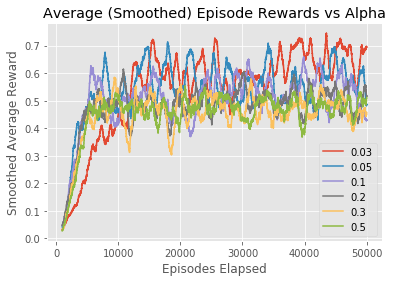

In [91]:
alpha_list = [str(i) for i in alpha_list]
data_results = pd.DataFrame(results[:,1:], columns = alpha_list)
data_results.iloc[1000:,:].plot()
plt.title('Average (Smoothed) Episode Rewards vs Alpha')
plt.xlabel('Episodes Elapsed')
plt.ylabel('Smoothed Average Reward')
plt.legend(loc='lower right')
plt.show()

Gamma: 0.5
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.075


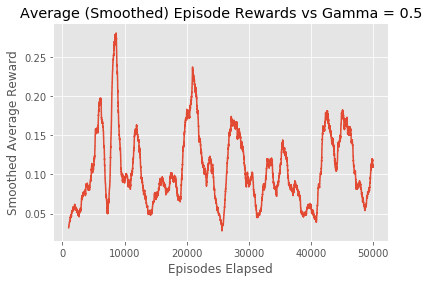

Gamma: 0.7
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.385


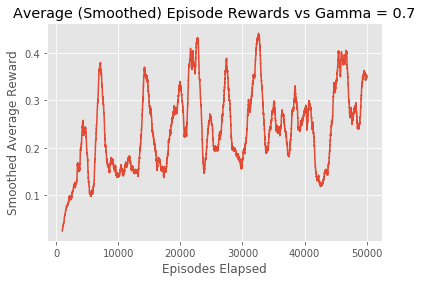

Gamma: 0.9
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.7


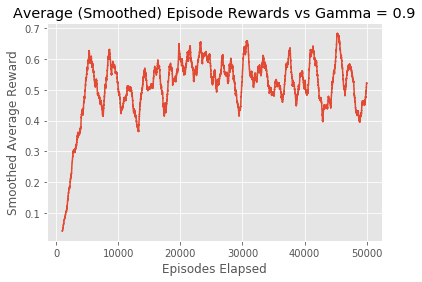

Gamma: 0.95
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.725


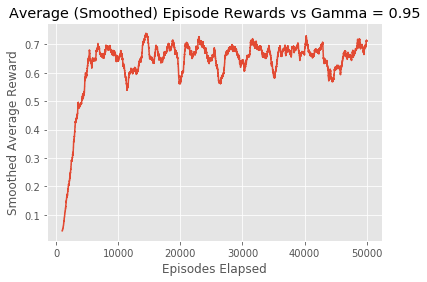

Gamma: 0.98
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.735


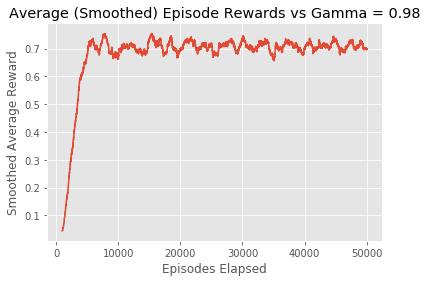

In [46]:
env = fl.FrozenLakeEnv(desc=None, map_name="4x4",is_slippery=True)
gamma_list = [0.5,0.7,0.9,0.95,0.98]
results = np.zeros((50000,1))

for g in gamma_list:
    print('Gamma: ' + str(g))
    q, q_diff, rewards_list, old_q, run_time_list, iteration_time_list = q_learner(env, eta=0.1, gma=g, epis=50000, epsilon=1.0, radr=0.999, threshold = 0.005)
    print("Reward Sum on final 200 episodes: " + str(sum(rewards_list[-200:-1])/200))
    x = pd.DataFrame(rewards_list).rolling(1000, min_periods=1000).mean()
    gamma_results= np.hstack([results,x])
    plt.plot(x)
    plt.title('Average (Smoothed) Episode Rewards vs Gamma = ' + str(g))
    plt.xlabel('Episodes Elapsed')
    plt.ylabel('Smoothed Average Reward')
    plt.show()

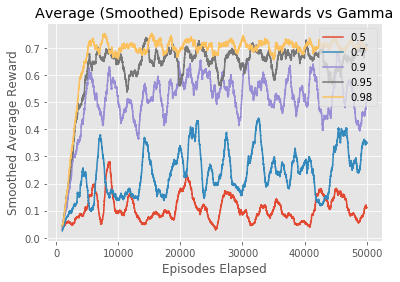

In [76]:
gamma_list = [str(i) for i in gamma_list]
data_results = pd.DataFrame(results, columns = gamma_list)
data_results.iloc[1000:,:].plot()
plt.title('Average (Smoothed) Episode Rewards vs Gamma')
plt.xlabel('Episodes Elapsed')
plt.ylabel('Smoothed Average Reward')
plt.legend(loc='upper right')
plt.show()

Epsilon Decay Rate: 0.9
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.0


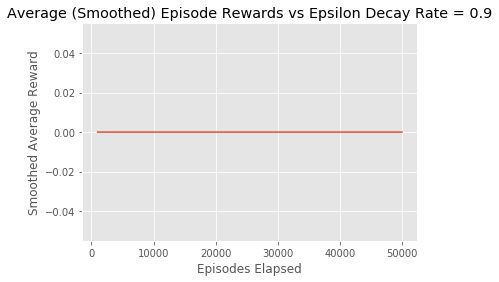

Epsilon Decay Rate: 0.99
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.0


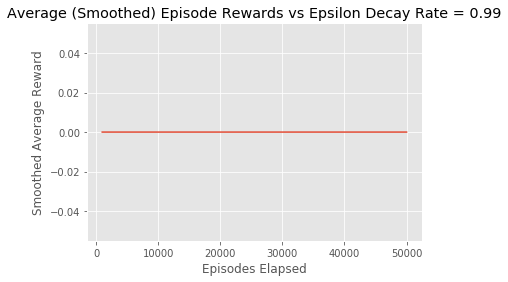

Epsilon Decay Rate: 0.999
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.755


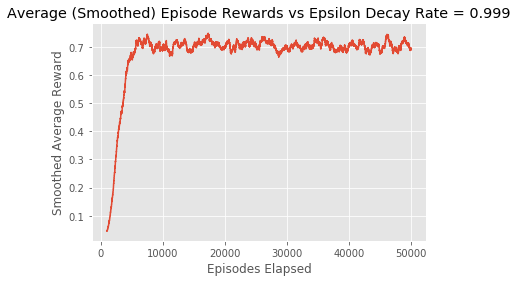

Epsilon Decay Rate: 0.9999
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.68


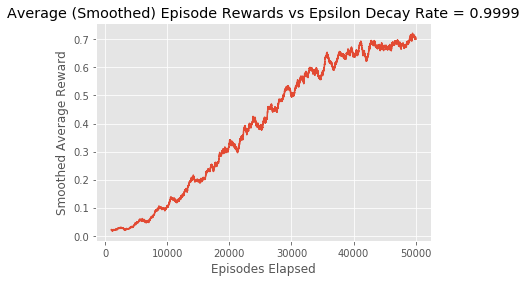

Epsilon Decay Rate: 0.99999
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.025


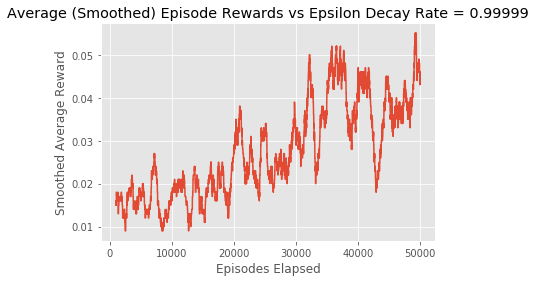

In [92]:
epsilon_decay_list = [0.9,0.99,0.999,0.9999,0.99999]
results = np.zeros((50000,1))

for r in epsilon_decay_list:
    print('Epsilon Decay Rate: ' + str(r))
    q, q_diff, rewards_list, old_q, run_time_list, iteration_time_list = q_learner(env, eta=0.1, gma=0.98, epis=50000, epsilon=1.0, radr=r, threshold = 0.005)
    print("Reward Sum on final 200 episodes: " + str(sum(rewards_list[-200:-1])/200))
    x = pd.DataFrame(rewards_list).rolling(1000, min_periods=1000).mean()
    results= np.hstack([results,x])
    plt.plot(x)
    plt.title('Average (Smoothed) Episode Rewards vs Epsilon Decay Rate = ' + str(r))
    plt.xlabel('Episodes Elapsed')
    plt.ylabel('Smoothed Average Reward')
    plt.show()

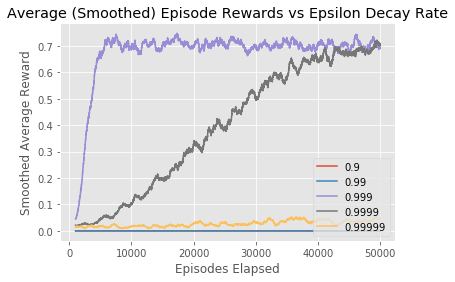

In [93]:
epsilon_decay_list = [str(i) for i in epsilon_decay_list]
data_results = pd.DataFrame(results[:,1:], columns = epsilon_decay_list)
data_results.iloc[1000:,:].plot()
plt.title('Average (Smoothed) Episode Rewards vs Epsilon Decay Rate')
plt.xlabel('Episodes Elapsed')
plt.ylabel('Smoothed Average Reward')
plt.legend(loc='lower right')
plt.show()

Epsilon Rate: 0.01
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.0


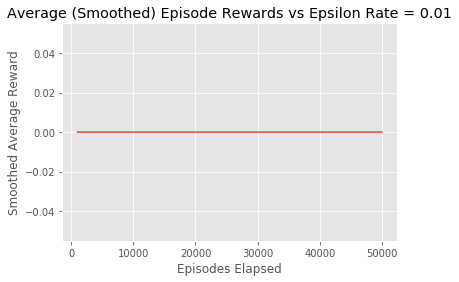

Epsilon Rate: 0.05
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.55


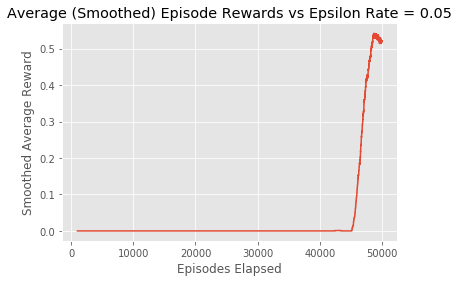

Epsilon Rate: 0.1
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.38


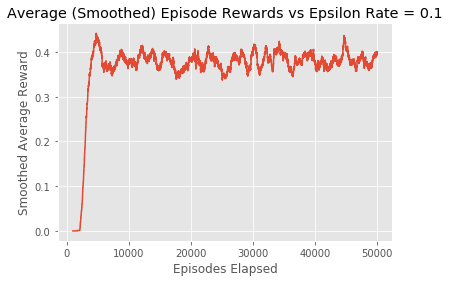

Epsilon Rate: 0.3
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.165


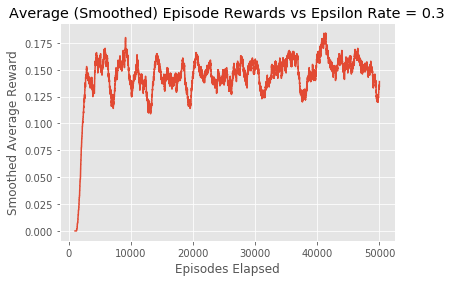

Epsilon Rate: 0.5
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.08


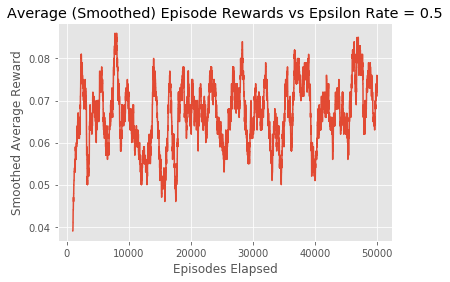

In [94]:
epsilon_list = [0.01, 0.05, 0.1, 0.3, 0.5]
results = np.zeros((50000,1))

for r in epsilon_list:
    print('Epsilon Rate: ' + str(r))
    q, q_diff, rewards_list, old_q, run_time_list, iteration_time_list = q_learner(env, eta=0.1, gma=0.98, epis=50000, epsilon=r, radr=1, threshold = 0.005)
    print("Reward Sum on final 200 episodes: " + str(sum(rewards_list[-200:-1])/200))
    x = pd.DataFrame(rewards_list).rolling(1000, min_periods=1000).mean()
    results= np.hstack([results,x])
    plt.plot(x)
    plt.title('Average (Smoothed) Episode Rewards vs Epsilon Rate = ' + str(r))
    plt.xlabel('Episodes Elapsed')
    plt.ylabel('Smoothed Average Reward')
    plt.show()

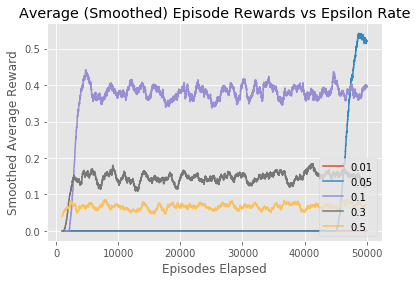

In [95]:
epsilon_list = [str(i) for i in epsilon_list]
data_results = pd.DataFrame(results[:,1:], columns = epsilon_list)
data_results.iloc[1000:,:].plot()
plt.title('Average (Smoothed) Episode Rewards vs Epsilon Rate')
plt.xlabel('Episodes Elapsed')
plt.ylabel('Smoothed Average Reward')
plt.legend(loc='lower right')
plt.show()

# 22x40 MDP

Epsilon Decay Rate: 0.9999
Episode: 0
Reward Sum on last 200 episodes: 0.0
Episode: 100000
Reward Sum on last 200 episodes: 0.0
Episode: 200000
Reward Sum on last 200 episodes: 0.0
Episode: 300000
Reward Sum on last 200 episodes: 0.0
Episode: 400000
Reward Sum on last 200 episodes: 0.0
Episode: 500000
Reward Sum on last 200 episodes: 0.0
Episode: 600000
Reward Sum on last 200 episodes: 0.0
Episode: 700000
Reward Sum on last 200 episodes: 0.0
Episode: 800000
Reward Sum on last 200 episodes: 0.0
Episode: 900000
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.0


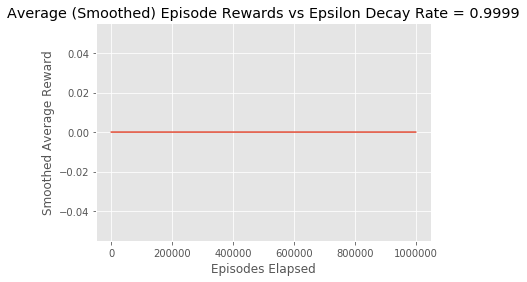

Epsilon Decay Rate: 0.99999
Episode: 0
Reward Sum on last 200 episodes: 0.0
Episode: 100000
Reward Sum on last 200 episodes: 0.0
Episode: 200000
Reward Sum on last 200 episodes: 0.0
Episode: 300000
Reward Sum on last 200 episodes: 0.0
Episode: 400000
Reward Sum on last 200 episodes: 0.0
Episode: 500000
Reward Sum on last 200 episodes: 0.0
Episode: 600000
Reward Sum on last 200 episodes: 0.0
Episode: 700000
Reward Sum on last 200 episodes: 0.0
Episode: 800000
Reward Sum on last 200 episodes: 0.0
Episode: 900000
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.0


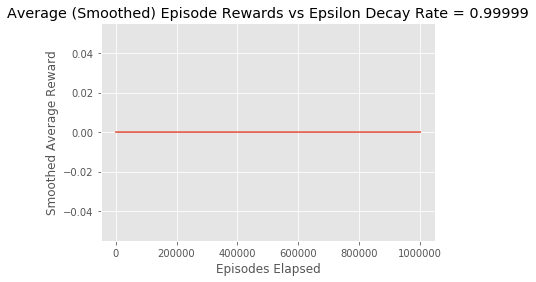

Epsilon Decay Rate: 0.999999
Episode: 0
Reward Sum on last 200 episodes: 0.0
Episode: 100000
Reward Sum on last 200 episodes: 0.0
Episode: 200000
Reward Sum on last 200 episodes: 0.0
Episode: 300000
Reward Sum on last 200 episodes: 0.0
Episode: 400000
Reward Sum on last 200 episodes: 0.0
Episode: 500000
Reward Sum on last 200 episodes: 0.0
Episode: 600000
Reward Sum on last 200 episodes: 0.0
Episode: 700000
Reward Sum on last 200 episodes: 0.0
Episode: 800000
Reward Sum on last 200 episodes: 0.0
Episode: 900000
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.0


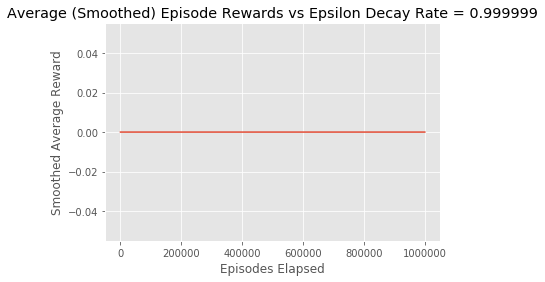

Epsilon Decay Rate: 0.9999999
Episode: 0
Reward Sum on last 200 episodes: 0.0
Episode: 100000
Reward Sum on last 200 episodes: 0.0
Episode: 200000
Reward Sum on last 200 episodes: 0.0
Episode: 300000
Reward Sum on last 200 episodes: 0.0
Episode: 400000
Reward Sum on last 200 episodes: 0.0
Episode: 500000
Reward Sum on last 200 episodes: 0.0
Episode: 600000
Reward Sum on last 200 episodes: 0.0
Episode: 700000
Reward Sum on last 200 episodes: 0.0
Episode: 800000
Reward Sum on last 200 episodes: 0.0
Episode: 900000
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.0


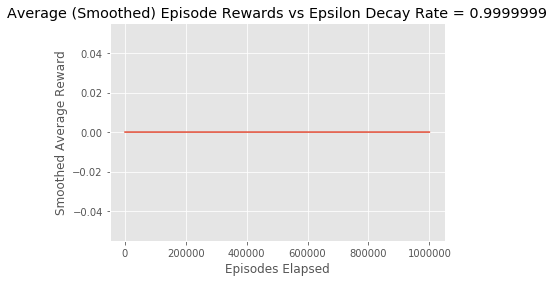

In [106]:
env = fl.FrozenLakeEnv(desc=None, map_name="22x40",is_slippery=True)
ep = 1000000
epsilon_decay_list = [0.9999,0.99999,0.999999,0.9999999]
results = np.zeros((ep,1))

for r in epsilon_decay_list:
    print('Epsilon Decay Rate: ' + str(r))
    q, q_diff, rewards_list, old_q, run_time_list, iteration_time_list= q_learner(env, eta=0.03, gma=1.0, epis=ep, epsilon=1.0, radr=r, threshold = 0.005)
    print("Reward Sum on final 200 episodes: " + str(sum(rewards_list[-200:-1])/200))
    x = pd.DataFrame(rewards_list).rolling(1000, min_periods=1000).mean()
    results= np.hstack([results,x])
    plt.plot(x)
    plt.title('Average (Smoothed) Episode Rewards vs Epsilon Decay Rate = ' + str(r))
    plt.xlabel('Episodes Elapsed')
    plt.ylabel('Smoothed Average Reward')
    plt.show()

In [27]:
env = fl.FrozenLakeEnv(desc=None, map_name="22x40",is_slippery=True)
q, q_diff, rewards_list, old_q, run_time_list, iteration_time_list= q_learner(env, eta=0.01, gma=1.0, epis=1000000, epsilon=1.0, radr=0.9999, threshold = 0.005)
print("Reward Sum on final 200 episodes: " + str(sum(rewards_list[-200:-1])/200))
x = pd.DataFrame(rewards_list).rolling(1000, min_periods=1000).mean()
results= np.hstack([results,x])
plt.plot(x)
plt.title('Average (Smoothed) Episode Rewards vs Epsilon Decay Rate = ' + str(eta))
plt.xlabel('Episodes Elapsed')
plt.ylabel('Smoothed Average Reward')
plt.show()

Episode: 0
Reward Sum on last 200 episodes: 0.0
Episode: 100000
Reward Sum on last 200 episodes: 0.0
Episode: 200000
Reward Sum on last 200 episodes: 0.0
Episode: 300000
Reward Sum on last 200 episodes: 0.0
Episode: 400000
Reward Sum on last 200 episodes: 0.0
Episode: 500000
Reward Sum on last 200 episodes: 0.0
Episode: 600000
Reward Sum on last 200 episodes: 0.0
Episode: 700000
Reward Sum on last 200 episodes: 0.0
Episode: 800000
Reward Sum on last 200 episodes: 0.0
Episode: 900000
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.0


ValueError: all the input array dimensions except for the concatenation axis must match exactly

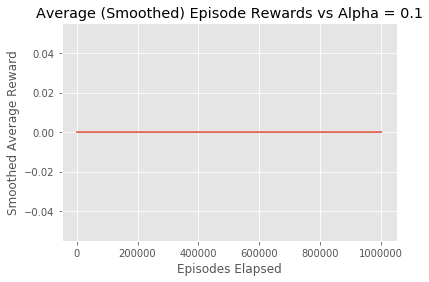

In [29]:
plt.plot(x)
plt.title('Average (Smoothed) Episode Rewards vs Alpha = ' + str(eta))
plt.xlabel('Episodes Elapsed')
plt.ylabel('Smoothed Average Reward')
plt.show()

In [ ]:
env = fl.FrozenLakeEnv(desc=None, map_name="22x40",is_slippery=True)
q, q_diff, rewards_list, old_q, run_time_list, iteration_time_list= q_learner(env, eta=0.03, gma=0.999, epis=1000000, epsilon=1.0, radr=0.999, threshold = 0.005)
print("Reward Sum on final 200 episodes: " + str(sum(rewards_list[-200:-1])/200))
x = pd.DataFrame(rewards_list).rolling(1000, min_periods=1000).mean()
results= np.hstack([results,x])
plt.plot(x)
plt.title('Average (Smoothed) Episode Rewards vs Epsilon Decay Rate = ' + str(g))
plt.xlabel('Episodes Elapsed')
plt.ylabel('Smoothed Average Reward')
plt.show()

# 8x8 MDP

Alpha: 0.03
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.475

Alpha: 0.05
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.68

Alpha: 0.1
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.0

Alpha: 0.2
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.67

Alpha: 0.3
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.445

Alpha: 0.5
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.415



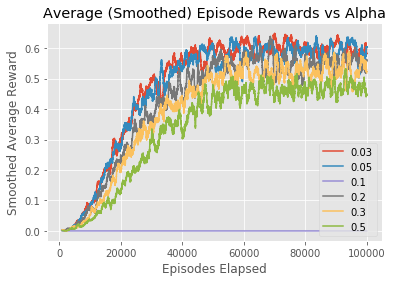

In [99]:
alpha_list = [0.03,0.05,0.1,0.2,0.3,0.5]
results = np.zeros((100000,1))
env = fl.FrozenLakeEnv(desc=None, map_name="8x8",is_slippery=True)

for a in alpha_list:
    print('Alpha: ' + str(a))
    q, q_diff, rewards_list, old_q = q_learner(env, eta=a, gma=0.98, epis=100000, epsilon=1.0, radr=0.9999, threshold = 0.005)
    print("Reward Sum on final 200 episodes: " + str(sum(rewards_list[-200:-1])/200))
    x = pd.DataFrame(rewards_list).rolling(1000, min_periods=1000).mean()
    results= np.hstack([results,x])
    print('')

alpha_list = [str(i) for i in alpha_list]
data_results = pd.DataFrame(results[:,1:], columns = alpha_list)
data_results.iloc[1000:,:].plot()
plt.title('Average (Smoothed) Episode Rewards vs Alpha')
plt.xlabel('Episodes Elapsed')
plt.ylabel('Smoothed Average Reward')
plt.legend(loc='lower right')
plt.show()

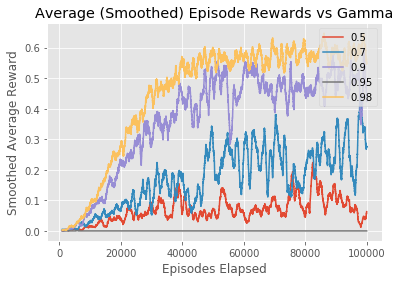

In [101]:
gamma_list = [0.5,0.7,0.9,0.95,0.98]
results = np.zeros((100000,1))

for g in gamma_list:
    print('Gamma: ' + str(g))
    q, q_diff, rewards_list, old_q, run_time_list, iteration_time_list= q_learner(env, eta=0.1, gma=g, epis=100000, epsilon=1.0, radr=0.9999, threshold = 0.005)
    print("Reward Sum on final 200 episodes: " + str(sum(rewards_list[-200:-1])/200))
    x = pd.DataFrame(rewards_list).rolling(1000, min_periods=1000).mean()
    results= np.hstack([results,x])
    print('')


gamma_list = [str(i) for i in gamma_list]
data_results = pd.DataFrame(results[:,1:], columns = gamma_list)
data_results.iloc[1000:,:].plot()
plt.title('Average (Smoothed) Episode Rewards vs Gamma')
plt.xlabel('Episodes Elapsed')
plt.ylabel('Smoothed Average Reward')
plt.legend(loc='upper right')
plt.show()

Epsilon Decay Rate: 0.9
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.0

Epsilon Decay Rate: 0.99
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.0

Epsilon Decay Rate: 0.999
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.0

Epsilon Decay Rate: 0.9999
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.455

Epsilon Decay Rate: 0.99999
Episode: 0
Reward Sum on last 200 episodes: 0.0
Reward Sum on final 200 episodes: 0.075



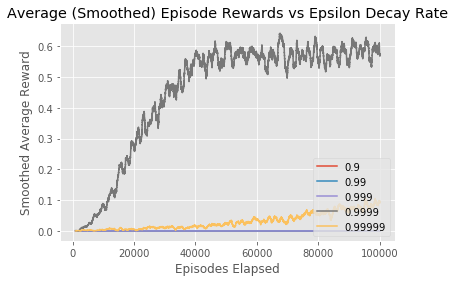

In [104]:
epsilon_decay_list = [0.9,0.99,0.999,0.9999,0.99999]
results = np.zeros((100000,1))

for r in epsilon_decay_list:
    print('Epsilon Decay Rate: ' + str(r))
    q, q_diff, rewards_list, old_q, run_time_list, iteration_time_list = q_learner(env, eta=0.1, gma=0.98, epis=100000, epsilon=1.0, radr=r, threshold = 0.005)
    print("Reward Sum on final 200 episodes: " + str(sum(rewards_list[-200:-1])/200))
    x = pd.DataFrame(rewards_list).rolling(1000, min_periods=1000).mean()
    results= np.hstack([results,x])
    print('')

epsilon_decay_list = [str(i) for i in epsilon_decay_list]
data_results = pd.DataFrame(results[:,1:], columns = epsilon_decay_list)
data_results.iloc[1000:,:].plot()
plt.title('Average (Smoothed) Episode Rewards vs Epsilon Decay Rate')
plt.xlabel('Episodes Elapsed')
plt.ylabel('Smoothed Average Reward')
plt.legend(loc='lower right')
plt.show()

In [ ]:
epsilon_list = [0.01, 0.05, 0.1, 0.3, 0.5]
results = np.zeros((100000,1))

for r in epsilon_list:
    print('Epsilon Rate: ' + str(r))
    q, q_diff, rewards_list, old_q, run_time_list, iteration_time_list = q_learner(env, eta=0.1, gma=0.98, epis=100000, epsilon=r, radr=1, threshold = 0.005)
    print("Reward Sum on final 200 episodes: " + str(sum(rewards_list[-200:-1])/200))
    x = pd.DataFrame(rewards_list).rolling(1000, min_periods=1000).mean()
    results= np.hstack([results,x])
    plt.plot(x)
    plt.title('Average (Smoothed) Episode Rewards vs Epsilon Rate = ' + str(r))
    plt.xlabel('Episodes Elapsed')
    plt.ylabel('Smoothed Average Reward')
    plt.show()

epsilon_list = [str(i) for i in epsilon_list]
data_results = pd.DataFrame(results[:,1:], columns = epsilon_list)
data_results.iloc[1000:,:].plot()
plt.title('Average (Smoothed) Episode Rewards vs Epsilon Rate')
plt.xlabel('Episodes Elapsed')
plt.ylabel('Smoothed Average Reward')
plt.legend(loc='lower right')
plt.show()

# Q Learning Time Charts

Episode: 0
Reward Sum on last 200 episodes: 0.0


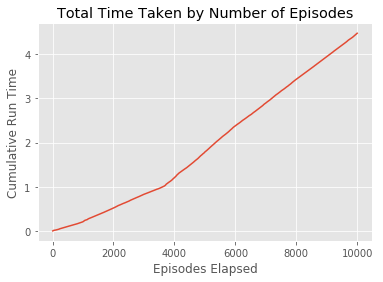

In [19]:
env = fl.FrozenLakeEnv(desc=None, map_name="4x4",is_slippery=True)
q, q_diff, rewards_list, old_q,  run_time_list, iteration_time_list = q_learner(env, eta=0.03, gma=1.0, epis=10000, epsilon=1.0, radr=0.999, threshold = 0.005)
x = pd.DataFrame(run_time_list).rolling(10, min_periods=10).mean()
#results= np.hstack([results,x])
plt.plot(x)
plt.title('Total Time Taken by Number of Episodes')
plt.xlabel('Episodes Elapsed')
plt.ylabel('Cumulative Run Time')
plt.show()

Episode: 0
Reward Sum on last 200 episodes: 0.0


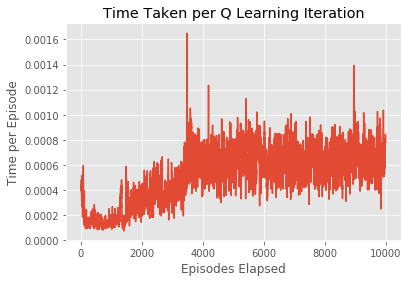

In [24]:
epsilon_decay_list = [0.9,0.99,0.999,0.9999,0.99999]
results = np.zeros((50000,1))
env = fl.FrozenLakeEnv(desc=None, map_name="4x4",is_slippery=True)

q, q_diff, rewards_list, old_q,  run_time_list, iteration_time_list = q_learner(env, eta=0.03, gma=1.0, epis=10000, epsilon=1.0, radr=0.999, threshold = 0.005)
x = pd.DataFrame(iteration_time_list).rolling(10, min_periods=10).mean()
#results= np.hstack([results,x])
plt.plot(x)
plt.title('Time Taken per Q Learning Iteration')
plt.xlabel('Episodes Elapsed')
plt.ylabel('Time per Episode')
plt.show()